In [1]:
# data
import numpy as np
import matplotlib.pyplot as plt

def get_column(data, index):
    result = [row[index] for row in data]
    return result

data = np.genfromtxt('data.csv', delimiter=',').tolist()

x_data  = get_column(data, 0)
y_data = get_column(data, 1)
N = len(x_data)

print(f'areas: {x_data}')
print(f'prices: {y_data}')
print(f'data_size: {N}')

areas: [6.7, 4.6, 3.5, 5.5]
prices: [9.1, 5.9, 4.6, 6.7]
data_size: 4


In [2]:
# forward
def predict(x, w, b):
    return x*w + b

# compute gradient
def gradient(y_hat, y, x):
    dw = x*(y_hat-y) / abs(y_hat-y)
    db = (y_hat-y) / abs(y_hat-y)
    
    return (dw, db)

# update weights
def update_weight(w, b, lr, dw, db):
    w_new = w - lr*dw
    b_new = b - lr*db
    
    return (w_new, b_new)

In [7]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameter
epoch_max = 20
losses = [] # for debug

for epoch in range(epoch_max):
    
    # for an epoch    
    for i in range(N):
        
        # get a sample
        x = x_data[i]
        y = y_data[i]      
        
        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = abs(y_hat-y)
        
        # for debug
        losses.append(loss)

        # compute gradient
        (dw, db) = gradient(y_hat, y, x)

        # update weights
        (w, b) = update_weight(w, b, lr, dw, db)
        
print(w, b)

1.1859999999999986 0.34000000000000014


In [8]:
area_real = 6
w = 1.212
b = 0.225
predicted_price = area_real*w + b
print('predicted_price: ', predicted_price)

predicted_price:  7.497


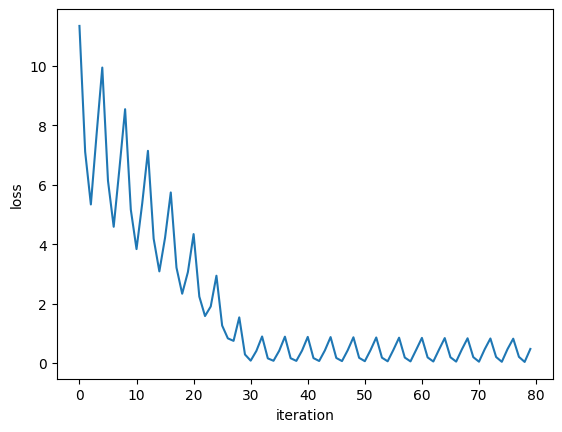

In [9]:
import matplotlib.pyplot as plt

plt.plot(losses) 
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

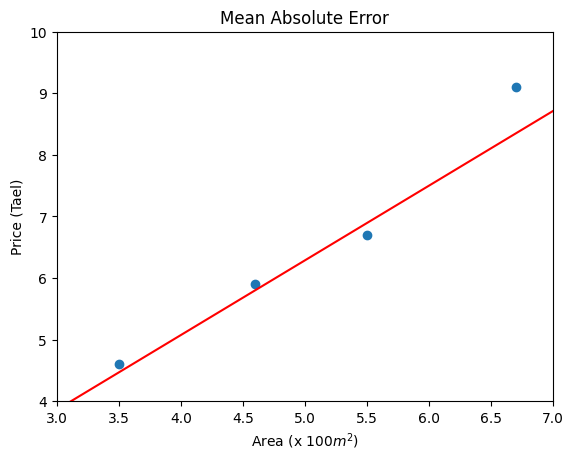

In [10]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

data = np.genfromtxt('data.csv', delimiter=',').tolist()
areas  = get_column(data, 0)
prices = get_column(data, 1)
plt.scatter(areas, prices)

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()